In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\iamkk\anaconda3\envs\ai_basic_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO

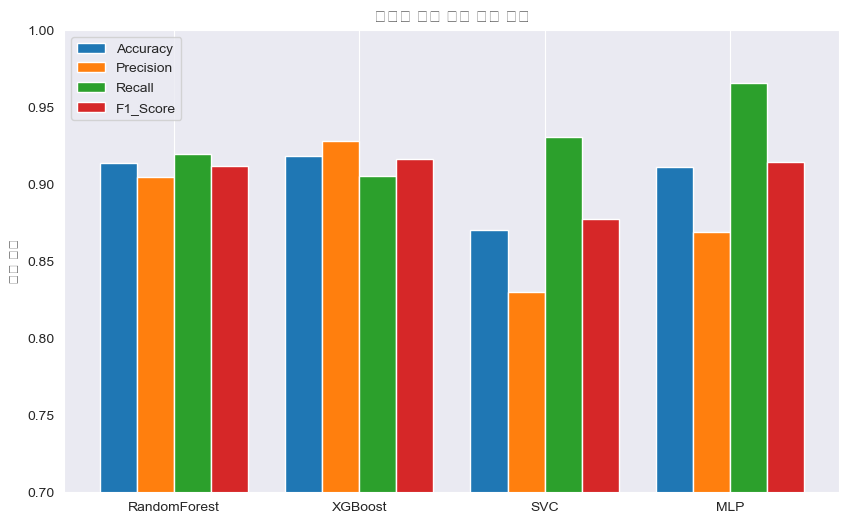

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
files = {
    "RandomForest": "data/RandomForest_metrics.csv",
    "XGBoost": "data/XGBoost_metrics.csv",
    "SVC": "data/SVC_metrics.csv",
    "MLP": "data/MLP_metrics.csv"
}

# 데이터프레임 로드 및 각 지표 평균 계산
metrics_avg = {}
for model, path in files.items():
    df = pd.read_csv(path)
    metrics_avg[model] = df.mean()

# 데이터프레임 생성 (모델별, 평가 지표별 평균)
avg_df = pd.DataFrame(metrics_avg).T

# 모델별로 그룹화된 바 차트 그리기 (x축: 모델, 색상별: metric)
labels = avg_df.index.tolist()  # 모델명 리스트
metrics = avg_df.columns.tolist()  # ['Accuracy', 'Precision', 'Recall', 'F1_Score']

x = np.arange(len(labels))  # 모델 개수
width = 0.2  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, avg_df[metric], width, label=metric)

ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(labels)
ax.set_ylim(0.7, 1.0)
ax.set_title('모델별 평가 지표 평균 비교')
ax.set_ylabel('평균 점수')
ax.legend()
ax.grid(axis='y')

plt.show()


# 최적 하이퍼 파라미터 요약

---

## RandomForest

- max_depth : 15 (가장 자주 등장)
- min_samples_leaf : 1 (모두 1)
- min_samples_split : 2 (모두 2)
- n_estimators : 200 (빈번히 등장, 100과 50도 있으나 200이 가장 많음)

---

## XGBoost

- colsample_bytree : 0.8 (가장 많이 최적값)
- learning_rate : 0.05, 0.1 (0.05가 약간 더 자주 나타남)
- max_depth : 5, 7, 9 (5와 9가 자주 보이나 9가 조금 더 많음)
- n_estimators : 100, 200 (200이 조금 더 많음)
- subsample : 0.8, 1.0 (0.8이 조금 더 빈번)

---

## SVC

- C : 10 (전부 동일)
- class_weight : None (더 자주 나오지만 'balanced' 도 몇 번 있음)
- gamma : 'scale' (전부 동일)
- kernel : 'rbf' (전부 동일)
- shrinking : True (대부분 True, False는 1~2회)

---

## MLPClassifier

- activation : 'relu' (더 많이 나옴), 'tanh'도 일부 우수 결과 있음
- alpha : 0.001 (가장 자주 등장), 0.01도 일부 우수 결과
- hidden_layer_sizes : (100, 50) (가장 많이 등장), (100,), (50, 50)도 있음
- solver : 'adam' (전부 동일)
